In [46]:
# 생선 품종 분류 모델
# feature : Weight, Legnth
# target : Species
# 기계학습 : 지도학습 + 분류 


In [47]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
data_file = '../data/fish.csv'
fishDF = pd.read_csv(data_file, usecols=[0,1,2])

In [48]:
# 중복되는 값을 제외하고, Bream(잉어), Smelt(빙어) 만 갖고옴
fishDF=fishDF[fishDF.duplicated()==False]
twofishDF=fishDF[fishDF['Species'].isin(['Bream', 'Smelt'])]
# 인덱스 리셋 
twofishDF.reset_index(drop=True, inplace=True)

In [49]:
# feature와 타겟 분리(x:feature, y:target)
x = twofishDF[['Weight','Length']]
y = twofishDF['Species'].replace({"Bream":0, "Smelt":1}).copy()

In [50]:
# 학습진행
model = KNeighborsClassifier() # KNN 인스턴스 생성
model.fit(x,y) # 학습 진행, 이때 x,y는 2차원 형태여야 한다 

KNeighborsClassifier()

In [51]:
print("classes_ : ",model.classes_) # y값 
print("feature_names_in_ : ",model.feature_names_in_) # x값
print("n_features_in_ : ",model.n_features_in_) # x개수 

classes_ :  [0 1]
feature_names_in_ :  ['Weight' 'Length']
n_features_in_ :  2


In [52]:
#검증
model.score(x,y) # 100점

1.0

In [53]:
# 2차원 형태의 데이터 생성 후 테스트
new_data=pd.DataFrame([[21.8,17]], columns=model.feature_names_in_)
model.predict(new_data) 

array([1], dtype=int64)

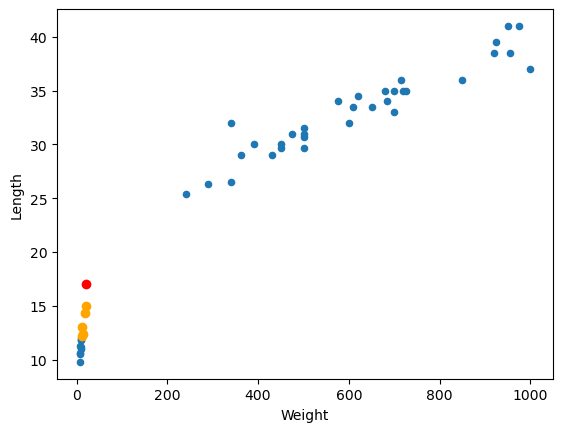

In [54]:
# x 출력
x.plot(kind="scatter",x="Weight",y="Length") 

# 테스트 값(입력) 출력
plt.plot(new_data.Weight.to_list()[0],new_data.Length.to_list()[0],"ro")

# 근접값 출력
_,index = model.kneighbors(new_data)
plt.scatter(x.loc[index[0]].Weight.to_list(),x.loc[index[0]].Length.to_list(),c="orange",marker="o")